<a href="https://www.kaggle.com/code/kelixirr/spaceship-titanic-end-to-end?scriptVersionId=158933252" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Spaceship Titanic 
**Predict which passengers are transported to an alternate dimension**

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

File and Data Field Descriptions

train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

1. PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
1. HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
1. CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
1. Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
1. Destination - The planet the passenger will be debarking to.
1. Age - The age of the passenger.
1. VIP - Whether the passenger has paid for special VIP service during the voyage.
1. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
1. Name - The first and last names of the passenger.
1. Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

sample_submission.csv - A submission file in the correct format.
PassengerId - Id for each passenger in the test set.
Transported - The target. For each passenger, predict either True or False.

## Analysing Our Training Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")

In [3]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [5]:
data.shape

(8693, 14)

In [6]:
data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
data.duplicated().sum()

0

In [10]:
data.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


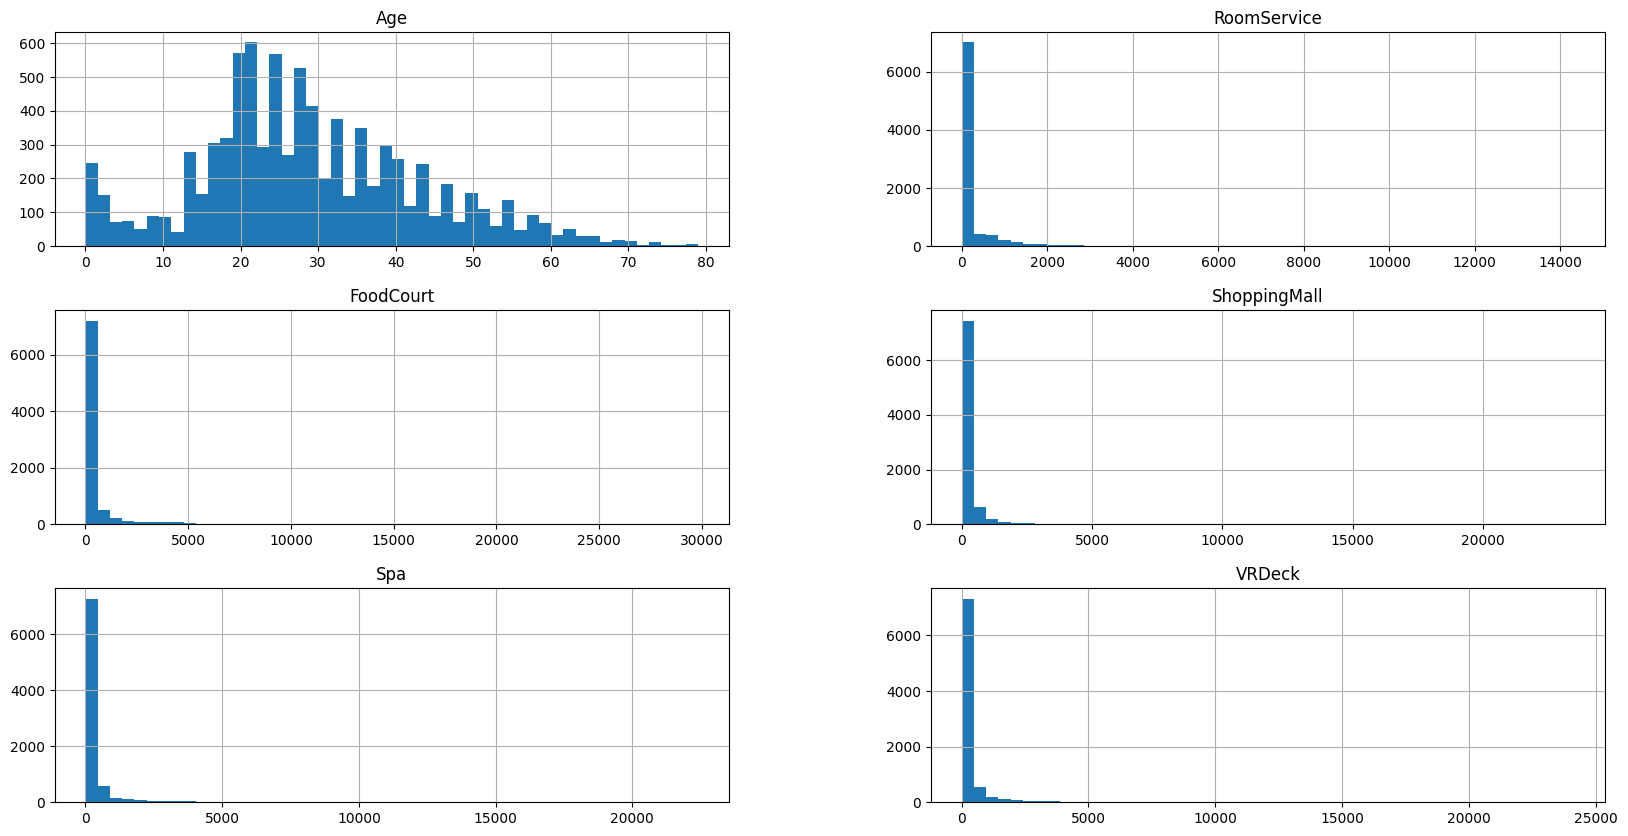

In [11]:
data.hist(bins = 50, figsize = (20, 10))
plt.show()

In [12]:
corr = data.corrwith(data["Transported"], numeric_only = True)
corr.sort_values(ascending = True)

RoomService    -0.244611
Spa            -0.221131
VRDeck         -0.207075
Age            -0.075026
ShoppingMall    0.010141
FoodCourt       0.046566
Transported     1.000000
dtype: float64

## Data Cleaning And Preparation Without NaN values for HistGradientBoostingClassifier
 It handles NaN values internally so we don't need to do anything. 

In [189]:
df = data[:]
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [190]:
X = df.drop(["Transported", 'PassengerId', 'Cabin', 'Name'], axis = 1)
X.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


In [191]:
y = df["Transported"]
y.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [192]:
X.shape

(8693, 10)

In [193]:
X.dtypes

HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [194]:
X = pd.get_dummies(X, columns = ['HomePlanet', 'CryoSleep', "Destination", 'VIP'])
X.shape

(8693, 16)

In [197]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6954, 16)
(1739, 16)
(6954,)
(1739,)


In [198]:
clf = HistGradientBoostingClassifier().fit(X_train, y_train)

In [199]:
y_pred = clf.predict(X_test)

In [200]:
accuracy_score(y_test, y_pred)

0.7837837837837838

In [201]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[642 219]
 [157 721]]


              precision    recall  f1-score   support

       False       0.80      0.75      0.77       861
        True       0.77      0.82      0.79       878

    accuracy                           0.78      1739
   macro avg       0.79      0.78      0.78      1739
weighted avg       0.79      0.78      0.78      1739



## Data Preprocessing Data For Other Models
We will not preprocess the data for other models because they don't handle null values like the previous model

In [202]:
new_df = data[:]
new_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [203]:
X_2 = new_df.drop(["Transported", "PassengerId", "Name", "Cabin"], axis = 1)
X_2.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


In [204]:
y_2 = df["Transported"]
y_2.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [205]:
X_2.isna().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

In [206]:
X_2.dtypes

HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [207]:
X_2.fillna({"Age": X_2["Age"].median(),
            "RoomService": X_2["RoomService"].median(),
            "FoodCourt": X_2["FoodCourt"].median(),
            "ShoppingMall": X_2["FoodCourt"].median(),
            "Spa": X_2["Spa"].median(),
            "VRDeck": X_2["VRDeck"].median()}, inplace=True)
X_2.isna().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
dtype: int64

In [208]:
X_2.fillna({
    "HomePlanet": X_2["HomePlanet"].mode()[0],
    "CryoSleep": X_2["CryoSleep"].mode()[0],
    "Destination": X_2["Destination"].mode()[0],
    "VIP": X_2["VIP"].mode()[0]
}, inplace = True)

X_2.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [209]:
y_2 = df["Transported"]
y_2.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [210]:
# preprocessing main test_data at the same time. 
test_data = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
test_data = test_data.drop(["PassengerId", "Name", "Cabin"], axis = 1)
test_data.fillna({"Age": test_data["Age"].median(),
            "RoomService": test_data["RoomService"].median(),
            "FoodCourt": test_data["FoodCourt"].median(),
            "ShoppingMall": test_data["FoodCourt"].median(),
            "Spa": test_data["Spa"].median(),
            "VRDeck": test_data["VRDeck"].median(),
            "HomePlanet": test_data["HomePlanet"].mode()[0],
            "CryoSleep": test_data["CryoSleep"].mode()[0],
            "Destination": test_data["Destination"].mode()[0],
            "VIP": test_data["VIP"].mode()[0]}, inplace=True)
test_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [211]:
test_data.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [212]:
test_data.dtypes

HomePlanet       object
CryoSleep          bool
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [213]:
X_2.dtypes

HomePlanet       object
CryoSleep          bool
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [214]:
print(test_data.shape)
print(X_2.shape)

(4277, 10)
(8693, 10)


In [215]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

columns = ["HomePlanet", "Destination"]

colum_trans = ColumnTransformer( 
    transformers = [("cat", OneHotEncoder(), columns)], 
    remainder = "passthrough")

c_transformer = colum_trans.fit(X_2)
X_2 = c_transformer.transform(X_2)
test_data = c_transformer.transform(test_data)

In [216]:
X_2.shape

(8693, 14)

In [217]:
test_data.shape

(4277, 14)

In [218]:
# dividing training set into training and test set. Don't touch the original test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, test_size = 0.2, random_state = 42)

print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(6954, 14)
(1739, 14)
(6954,)
(1739,)


## Gradient Boosting Classifier

In [219]:
from sklearn.ensemble import GradientBoostingClassifier

clf2 = GradientBoostingClassifier().fit(X2_train, y2_train)
y2_pred = clf2.predict(X2_test)
print(confusion_matrix(y2_test, y2_pred))
print("\n")
print(accuracy_score(y2_test, y2_pred))

[[622 239]
 [142 736]]


0.7809085681426107


In [220]:
clf3 = GradientBoostingClassifier(n_estimators = 300, subsample = 0.5).fit(X2_train, y2_train)
y2_pred = clf3.predict(X2_test)
print(confusion_matrix(y2_test, y2_pred))
print("\n")
print(accuracy_score(y2_test, y2_pred))

[[638 223]
 [155 723]]


0.7826336975273146


In [222]:
# performing grid search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}


clf_grad = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=clf_grad,
    param_grid=param_grid,
    scoring='accuracy',  
    cv=3, 
    n_jobs=-1 
)


grid_search.fit(X2_train, y2_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50}


In [223]:
best_gbc = grid_search.best_estimator_
y_pred = best_gbc.predict(X2_test)
accuracy_score(y2_test, y2_pred)

0.7826336975273146

## Random Forest Classifier

In [224]:
from sklearn.ensemble import RandomForestClassifier

clf4 = RandomForestClassifier().fit(X2_train, y2_train)
y2_pred = clf4.predict(X2_test)
print(confusion_matrix(y2_test, y2_pred))
print("\n")
print(accuracy_score(y2_test, y2_pred))

[[658 203]
 [176 702]]


0.78205865439908


In [225]:
clf5 = RandomForestClassifier(n_estimators= 50).fit(X2_train, y2_train)
y2_pred = clf5.predict(X2_test)
print(confusion_matrix(y2_test, y2_pred))
print("\n")
print(accuracy_score(y2_test, y2_pred))

[[662 199]
 [188 690]]


0.777458309373203


In [226]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_forest = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=random_forest,
    param_grid=param_grid,
    scoring='accuracy', 
    cv=3, 
    n_jobs=-1 
)

grid_search.fit(X2_train, y2_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}


In [227]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X2_test)
accuracy_score(y2_test, y2_pred)

0.777458309373203

## Ada Boost Classifier

In [228]:
from sklearn.ensemble import AdaBoostClassifier
clf6 = AdaBoostClassifier().fit(X2_train, y2_train)
y2_pred = clf6.predict(X2_test)
print(confusion_matrix(y2_test, y2_pred))
print("\n")
print(accuracy_score(y2_test, y2_pred))

[[632 229]
 [158 720]]


0.777458309373203


In [229]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
}

adaboost = AdaBoostClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=adaboost,
    param_grid=param_grid,
    scoring='accuracy', 
    cv=3,  
    n_jobs=-1 
)

grid_search.fit(X2_train, y2_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [230]:
best_ada = grid_search.best_estimator_
y_pred = best_ada.predict(X2_test)
accuracy_score(y2_test, y2_pred)

0.777458309373203

## SGD Classifier

In [232]:
from sklearn.linear_model import SGDClassifier

param_grid = {
    'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-3, 1e-4, 1e-5]
}

sgd_classifier = SGDClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=sgd_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)

grid_search.fit(X2_train, y2_train)

GridSearchCV(cv=3, estimator=SGDClassifier(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'loss': ['hinge', 'log_loss', 'modified_huber',
                                  'squared_hinge'],
                         'max_iter': [1000, 2000, 3000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='accuracy')

In [233]:
best_sgdc = grid_search.best_estimator_
y_pred = best_sgdc.predict(X2_test)
accuracy_score(y2_test, y2_pred)

0.777458309373203

In [234]:
y_pred = best_gbc.predict(test_data)
y_pred

array([ True, False,  True, ...,  True,  True,  True])

In [239]:
submission = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
submission

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [240]:
final_result = pd.DataFrame({
    
    "PassengerId": submission["PassengerId"],
    "Transported": y_pred
})

final_result.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [249]:
final_result.to_csv("submission.csv", index = False)

If you have read it till the end, do note one thing. The accuracy could be achieve further by doing feature engineering on one important column that I have removed due to one hot encoding issue. It was happening because of the high number of unqiue values in both train and main test set. One hot encoder won't work due to that, additional using label encoder is not a good idea here due to high cardinality and many models may assume ordinal relationship which does not seem to be the case. After removing Cabin column, my accuracy dropped from 86 to 78 on X_test but I do believe including Cabin column in some way may increase the performance.

**Please upvote if you found this helpful**